## Importing and Cleaning the Data

In [1]:
!head -1 data/AirBase_v7_stations.csv

station_european_code	station_local_code	country_iso_code	country_name	station_name	station_start_date	station_end_date	type_of_station	station_ozone_classification	station_type_of_area	station_subcat_rural_back	street_type	station_longitude_deg	station_latitude_deg	station_altitude	station_city	lau_level1_code	lau_level2_code	lau_level2_name	EMEP_station


In [2]:
from IPython.display import HTML
HTML('<iframe src=http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8 width=750 height=350></iframe>')

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
!head -1 data/AirBase_v7_stations.csv


station_european_code	station_local_code	country_iso_code	country_name	station_name	station_start_date	station_end_date	type_of_station	station_ozone_classification	station_type_of_area	station_subcat_rural_back	street_type	station_longitude_deg	station_latitude_deg	station_altitude	station_city	lau_level1_code	lau_level2_code	lau_level2_name	EMEP_station


In [29]:
airline_data = pd.read_csv('data/AirBase_v7_stations.csv', sep='\t',names=None)

In [28]:
airline_data.head()

,station_european_code,station_local_code,country_iso_code,country_name,station_name,station_start_date,station_end_date,type_of_station,station_ozone_classification,station_type_of_area,station_subcat_rural_back,street_type,station_longitude_deg,station_latitude_deg,station_altitude,station_city,lau_level1_code,lau_level2_code,lau_level2_name,EMEP_station
0,AD0944A,944,AD,ANDORRA,Engolasters,2006-02-10,NaN,Background,NaN,rural,NaN,NaN,1.565014,42.516945,1637,NaN,NaN,NaN,NaN,no
1,AD0945A,945,AD,ANDORRA,Envalira,2011-05-01,NaN,Background,NaN,rural,NaN,NaN,1.716986,42.534882,2515,NaN,NaN,NaN,NaN,no
2,AD0942A,942,AD,ANDORRA,Escaldes-Engordany,2004-06-17,NaN,Background,NaN,urban,NaN,NaN,1.539172,42.509724,1080,ANDORRA LA VELLA,NaN,NaN,NaN,no
3,AL0201A,AL360A01,AL,ALBANIA,Tirana Center,2010-01-06,NaN,Traffic,urban,urban,NaN,Canyon street: L/H < 1.5,19.821772,41.330269,162,TIRANA,NaN,NaN,NaN,no
4,AL0202A,AL360A02,AL,ALBANIA,Tirana IPH,2010-06-15,NaN,Traffic,suburban,suburban,NaN,Wide street: L/H > 1.5,19.851667,41.345600,207,TIRANA,NaN,NaN,NaN,no


In [32]:
new_airlinedata = airline_data.drop('station_latitude_deg',axis=1)
new_airlinedata.head()

,station_european_code,station_local_code,country_iso_code,country_name,station_name,station_start_date,station_end_date,type_of_station,station_ozone_classification,station_type_of_area,station_subcat_rural_back,street_type,station_longitude_deg,station_altitude,station_city,lau_level1_code,lau_level2_code,lau_level2_name,EMEP_station
0,AD0944A,944,AD,ANDORRA,Engolasters,2006-02-10,NaN,Background,NaN,rural,NaN,NaN,1.565014,1637,NaN,NaN,NaN,NaN,no
1,AD0945A,945,AD,ANDORRA,Envalira,2011-05-01,NaN,Background,NaN,rural,NaN,NaN,1.716986,2515,NaN,NaN,NaN,NaN,no
2,AD0942A,942,AD,ANDORRA,Escaldes-Engordany,2004-06-17,NaN,Background,NaN,urban,NaN,NaN,1.539172,1080,ANDORRA LA VELLA,NaN,NaN,NaN,no
3,AL0201A,AL360A01,AL,ALBANIA,Tirana Center,2010-01-06,NaN,Traffic,urban,urban,NaN,Canyon street: L/H < 1.5,19.821772,162,TIRANA,NaN,NaN,NaN,no
4,AL0202A,AL360A02,AL,ALBANIA,Tirana IPH,2010-06-15,NaN,Traffic,suburban,suburban,NaN,Wide street: L/H > 1.5,19.851667,207,TIRANA,NaN,NaN,NaN,no


### Stack and Unstack data

In [73]:
df=pd.DataFrame({'A':['one', 'one','two', 'two'],'B':['a','a','b','b'],'C':[i for i in range(4)]})
df

,A,B,C
0,one,a,0
1,one,a,1
2,two,b,2
3,two,b,3


In [81]:
import pandas.util.testing as tm; tm.N = 3
def unpivot(frame):
    N, K = frame.shape
    data = {'value' : frame.values.ravel('F'),
            'variable' : np.asarray(frame.columns).repeat(N),
            'date' : np.tile(np.asarray(frame.index), K)}
    return pd.DataFrame(data, columns=['date', 'variable', 'value'])
df = unpivot(tm.makeTimeDataFrame())


In [82]:
df

,date,variable,value
0,2000-01-03,A,0.307708
1,2000-01-04,A,-0.374244
2,2000-01-05,A,0.884356
3,2000-01-03,B,-1.616559
4,2000-01-04,B,0.035088
5,2000-01-05,B,-0.079845
6,2000-01-03,C,0.154871
7,2000-01-04,C,-1.034501
8,2000-01-05,C,1.614770
9,2000-01-03,D,0.221502


In [83]:
df[df['variable'] == 'A']

,date,variable,value
0,2000-01-03,A,0.307708
1,2000-01-04,A,-0.374244
2,2000-01-05,A,0.884356


In [84]:
df.pivot(index='date', columns='variable', values='value')

variable,A,B,C,D
date,,,,
2000-01-03,0.307708,-1.616559,0.154871,0.221502
2000-01-04,-0.374244,0.035088,-1.034501,1.197832
2000-01-05,0.884356,-0.079845,1.614770,-0.947048


## Stack

In [87]:
stacked = df.pivot(index='date', columns='variable', values='value').stack()
stacked


date        variable
2000-01-03  A           0.307708
            B          -1.616559
            C           0.154871
            D           0.221502
2000-01-04  A          -0.374244
            B           0.035088
            C          -1.034501
            D           1.197832
2000-01-05  A           0.884356
            B          -0.079845
            C           1.614770
            D          -0.947048
dtype: float64

## Unstack

In [94]:
stacked.unstack()

variable,A,B,C,D
date,,,,
2000-01-03,0.307708,-1.616559,0.154871,0.221502
2000-01-04,-0.374244,0.035088,-1.034501,1.197832
2000-01-05,0.884356,-0.079845,1.614770,-0.947048


In [96]:
stacked.unstack(0)

date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00
variable,,,
A,0.307708,-0.374244,0.884356
B,-1.616559,0.035088,-0.079845
C,0.154871,-1.034501,1.614770
D,0.221502,1.197832,-0.947048


In [97]:
stacked.unstack(1)

variable,A,B,C,D
date,,,,
2000-01-03,0.307708,-1.616559,0.154871,0.221502
2000-01-04,-0.374244,0.035088,-1.034501,1.197832
2000-01-05,0.884356,-0.079845,1.614770,-0.947048


In [103]:
stacked.unstack('date')

date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00
variable,,,
A,0.307708,-0.374244,0.884356
B,-1.616559,0.035088,-0.079845
C,0.154871,-1.034501,1.614770
D,0.221502,1.197832,-0.947048


In [105]:
stacked.unstack('date')

date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00
variable,,,
A,0.307708,-0.374244,0.884356
B,-1.616559,0.035088,-0.079845
C,0.154871,-1.034501,1.614770
D,0.221502,1.197832,-0.947048


#### Pivot Table using pivot_table

In [3]:
df=pd.DataFrame({'A':['one', 'one','two', 'two'],'B':['a','a','b','b'],'C':[i for i in range(4)]})
df

,A,B,C
0,one,a,0
1,one,a,1
2,two,b,2
3,two,b,3


In [22]:
df.pivot_table(index='A', columns='B', values='C',aggfunc=np.mean)

B,a,b
A,,
one,0.5,NaN
two,NaN,2.5


#### head and tail funcs for the data frame


In [25]:
df.head(1)

,A,B,C
0,one,a,0


In [26]:
df.tail(1)

,A,B,C
3,two,b,3


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
A    4 non-null object
B    4 non-null object
C    4 non-null int64
dtypes: int64(1), object(2)
memory usage: 104.0+ bytes


In [28]:
df.describe()

,C
count,4.000000
mean,1.500000
std,1.290994
min,0.000000
25%,0.750000
50%,1.500000
75%,2.250000
max,3.000000


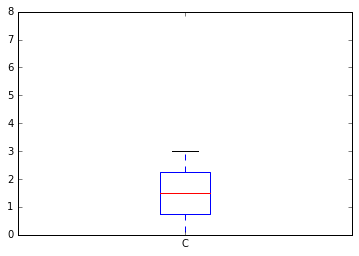

In [35]:
df.plot(kind='box', ylim=[0,8])

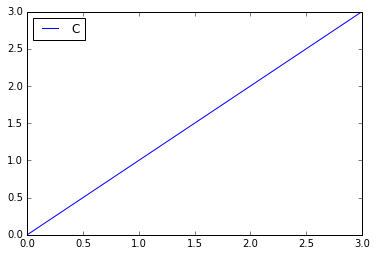

In [36]:
df.plot()

In [37]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [41]:
df["A"]

0    one
1    one
2    two
3    two
Name: A, dtype: object

In [57]:
df

,A,B,C
0,one,a,0
1,one,a,1
2,two,b,2
3,two,b,3


In [53]:
dates = pd.date_range('1/1/2000', periods=8)
df1 = pd.DataFrame(np.random.randn(8, 4), index=dates, columns=['A', 'B', 'C', 'D'])
df1

,A,B,C,D
2000-01-01,-1.093362,-1.945607,0.023078,0.029393
2000-01-02,0.657322,1.482542,0.036511,-0.280776
2000-01-03,1.144299,-1.051218,1.261069,0.474791
2000-01-04,-0.107704,-0.228706,1.397333,-1.268177
2000-01-05,0.709955,0.620618,-0.982270,-0.278377
2000-01-06,-1.343598,0.076897,-0.636455,-0.280574
2000-01-07,-0.503674,-1.034541,0.150421,1.550754
2000-01-08,1.478866,2.775901,-0.969762,0.252397


In [54]:
df1["2000-01-01":"2000-01-04"]


,A,B,C,D
2000-01-01,-1.093362,-1.945607,0.023078,0.029393
2000-01-02,0.657322,1.482542,0.036511,-0.280776
2000-01-03,1.144299,-1.051218,1.261069,0.474791
2000-01-04,-0.107704,-0.228706,1.397333,-1.268177
